In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [134]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Loan_Prediction_train.csv")
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Loan_prediction_test.csv")
print(df.shape,"\n")
print(df.columns,"\n")
print(df.info(),"\n")
print(df.isnull().sum())


(614, 13) 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property

In [135]:
print(df.head())

    Loan_ID Gender Married  ... Credit_History Property_Area Loan_Status
0  LP001002   Male      No  ...            1.0         Urban           Y
1  LP001003   Male     Yes  ...            1.0         Rural           N
2  LP001005   Male     Yes  ...            1.0         Urban           Y
3  LP001006   Male     Yes  ...            1.0         Urban           Y
4  LP001008   Male      No  ...            1.0         Urban           Y

[5 rows x 13 columns]


In [136]:
#GENDER
print(df['Gender'].value_counts(),"\n")
print(df['Gender'].isnull().sum(),"\n")
print(df['Gender'].fillna('Male',inplace=True))
print(df['Gender'].isnull().sum(),"\n")
df['Gender'] = df['Gender'].apply({'Male':1, 'Female':0}.get)
df.head()

Male      489
Female    112
Name: Gender, dtype: int64 

13 

None
0 



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [137]:
#Married
print(df['Married'].isnull().sum(),"\n")
print(df['Married'].value_counts(),"\n")
print(df['Married'].fillna('Yes',inplace = True))
print(df['Married'].isnull().sum(),"\n")
df['Married'] = df['Married'].apply({'Yes':1, 'No':0}.get)

3 

Yes    398
No     213
Name: Married, dtype: int64 

None
0 



In [138]:
#Dependents
print(df['Dependents'].unique())
print(df["Dependents"].isnull().sum())
print(df['Dependents'].value_counts())
df.drop('Dependents',1,inplace=True)
print(df.info())


['0' '1' '2' '3+' nan]
15
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 57.7+ KB
None


In [139]:


#Self Employed
print(df['Self_Employed'].isnull().sum())
print(df['Self_Employed'].value_counts())
print(df['Self_Employed'].fillna('No',inplace=True))
print(df['Self_Employed'].isnull().sum())
df['Self_Employed'] = df['Self_Employed'].apply({'Yes':1, 'No':0}.get)

32
No     500
Yes     82
Name: Self_Employed, dtype: int64
None
0


In [140]:


print(df['ApplicantIncome'].isnull().sum())
print(df['CoapplicantIncome'].isnull().sum())

0
0


22
146.41216216216216 128.0
None
0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


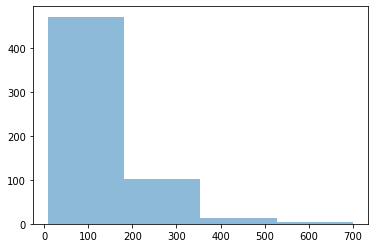

In [141]:
#LoanAmount
print(df['LoanAmount'].isnull().sum())
plt.hist('LoanAmount',bins=4,data = df,alpha=0.5)
print(df['LoanAmount'].mean(),df['LoanAmount'].median())
print(df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True))
print(df['LoanAmount'].isnull().sum())

[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64
14
0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


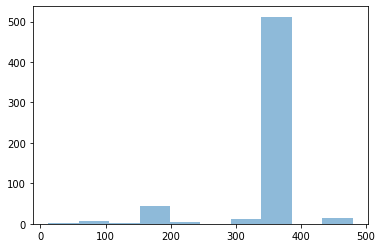

In [142]:
#Loan_Amount_term


print(df['Loan_Amount_Term'].unique())
print(df['Loan_Amount_Term'].describe())
print(df['Loan_Amount_Term'].isnull().sum())
plt.hist('Loan_Amount_Term',data=df,alpha=0.5)
#plt.boxplot('Loan_Amount_Term',data=df)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
print(df['Loan_Amount_Term'].isnull().sum())

0


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


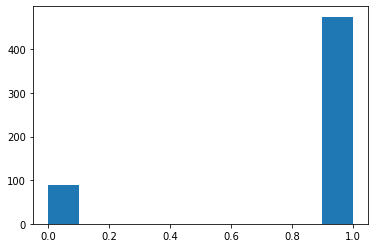

In [143]:
#CreditHistory
df['Credit_History'].unique()
plt.hist('Credit_History',data = df)
df['Credit_History'].fillna(1,inplace = True)
print(df['Credit_History'].isnull().sum())

In [0]:
df['Credit_History'] = df['Credit_History'].apply(np.int64)

In [145]:
print(df.isnull().sum())
df.head()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,Graduate,0,5849,0.0,128.0,360.0,1,Urban,Y
1,LP001003,1,1,Graduate,0,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,1,1,Graduate,1,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,1,1,Not Graduate,0,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,1,0,Graduate,0,6000,0.0,141.0,360.0,1,Urban,Y


In [146]:
#Property_Area
print(df['Property_Area'].unique())
df['Property_Area'] = df['Property_Area'].apply({'Urban':0, 'Rural':1,'Semiurban':2}.get)
df['Property_Area'] = df['Property_Area'].apply(np.int64)


['Urban' 'Rural' 'Semiurban']


In [147]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,Graduate,0,5849,0.0,128.0,360.0,1,0,Y
1,LP001003,1,1,Graduate,0,4583,1508.0,128.0,360.0,1,1,N
2,LP001005,1,1,Graduate,1,3000,0.0,66.0,360.0,1,0,Y
3,LP001006,1,1,Not Graduate,0,2583,2358.0,120.0,360.0,1,0,Y
4,LP001008,1,0,Graduate,0,6000,0.0,141.0,360.0,1,0,Y


In [0]:
df['Loan_Status'] = df['Loan_Status'].apply({'Y':1,'N':0}.get)

In [0]:
df['Education'] = df['Education'].apply({'Graduate':1,'Not Graduate':0}.get)

In [150]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,1,0,5849,0.0,128.0,360.0,1,0,1
1,LP001003,1,1,1,0,4583,1508.0,128.0,360.0,1,1,0
2,LP001005,1,1,1,1,3000,0.0,66.0,360.0,1,0,1
3,LP001006,1,1,0,0,2583,2358.0,120.0,360.0,1,0,1
4,LP001008,1,0,1,0,6000,0.0,141.0,360.0,1,0,1


In [0]:
#CoapplicantIncome
df.drop('CoapplicantIncome',1,inplace=True)
df.drop('Loan_ID',1,inplace=True)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            614 non-null    int64  
 1   Married           614 non-null    int64  
 2   Education         614 non-null    int64  
 3   Self_Employed     614 non-null    int64  
 4   ApplicantIncome   614 non-null    int64  
 5   LoanAmount        614 non-null    float64
 6   Loan_Amount_Term  614 non-null    float64
 7   Credit_History    614 non-null    int64  
 8   Property_Area     614 non-null    int64  
 9   Loan_Status       614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [0]:
X = df.drop(['Loan_Status'],1)
y = df['Loan_Status']


In [155]:
clf = LogisticRegression()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
score = accuracy_score(y_test,ypred)
cm = confusion_matrix(y_test,ypred)
print("PRECISION",metrics.precision_score(y_test,ypred))
print("RECALL",metrics.recall_score(y_test,ypred))
print("ACCURACY SCORE",score)

#confusion(cm,score)


PRECISION 0.7904761904761904
RECALL 1.0
ACCURACY SCORE 0.8211382113821138


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


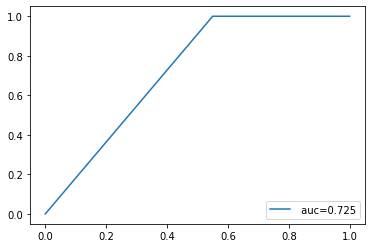

In [156]:
fpr, tpr, _ = metrics.roc_curve(y_test,  ypred)
auc = metrics.roc_auc_score(y_test, ypred)
plt.plot(fpr,tpr,label=" auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0.5, 15.0, 'Predicted label')

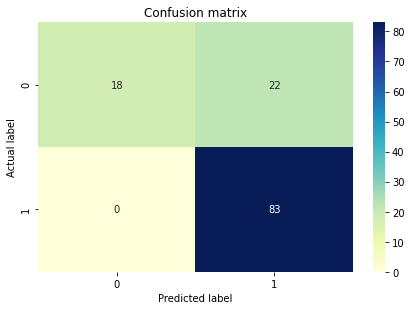

In [157]:
sns.heatmap(cm, annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier 


In [159]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
score = accuracy_score(y_test,ypred)
cm = confusion_matrix(y_test,ypred)
print(score)

0.7073170731707317


In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.6422764227642277
